# Convolution

## im2col

In [1]:
import numpy as np

def im2col(img, flt_h, flt_w):
    """Convert image into columns"""
    H, W = img.shape
    out = np.zeros((flt_h * flt_w, (H - flt_h + 1) * (W - flt_w + 1)))
    for y in range(flt_h):
        y_max = y + H - flt_h
        for x in range(flt_w):
            x_max = x + W - flt_w
            out[y * flt_w + x] = img[y:y_max+1, x:x_max+1].ravel()
    return out

In [3]:
img = np.arange(1, 17).reshape(4, 4)

cols = im2col(img, 2, 2)
print(cols)

[[ 1.  2.  3.  5.  6.  7.  9. 10. 11.]
 [ 2.  3.  4.  6.  7.  8. 10. 11. 12.]
 [ 5.  6.  7.  9. 10. 11. 13. 14. 15.]
 [ 6.  7.  8. 10. 11. 12. 14. 15. 16.]]


In [4]:
def im2col(images, flt_h, flt_w, stride, pad):
    """Convert images into columns"""
    N, C, H, W = images.shape
    out_h = (H + 2 * pad - flt_h) // stride + 1
    out_w = (W + 2 * pad - flt_w) // stride + 1
    img = np.pad(images, [(0, 0), (0, 0), (pad, pad), (pad, pad)], 'constant')
    cols = np.zeros((N, C, flt_h, flt_w, out_h, out_w))
    for y in range(flt_h):
        y_max = y + stride * out_h
        for x in range(flt_w):
            x_max = x + stride * out_w
            cols[:, :, y, x, :, :] = img[:, :, y:y_max:stride, x:x_max:stride]
    return cols.transpose(0, 4, 5, 1, 2, 3).reshape(N * out_h * out_w, -1)

In [7]:
images = np.arange(1, 17).reshape(1, 1, 4, 4)
cols = im2col(images, 2, 2, 1, 0)
print(cols)

[[ 1.  2.  5.  6.]
 [ 2.  3.  6.  7.]
 [ 3.  4.  7.  8.]
 [ 5.  6.  9. 10.]
 [ 6.  7. 10. 11.]
 [ 7.  8. 11. 12.]
 [ 9. 10. 13. 14.]
 [10. 11. 14. 15.]
 [11. 12. 15. 16.]]


## Convolution

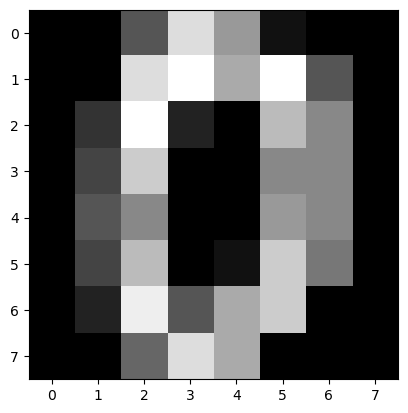

In [9]:
import matplotlib.pyplot as plt
from sklearn import datasets

digits = datasets.load_digits()
images = digits.data[0].reshape(8,8)
plt.imshow(images, cmap='gray')
plt.show()

In [10]:
def im2col(img, flt_h, flt_w, out_h, out_w):
    """Convert image into columns"""
    cols = np.zeros((flt_h * flt_w, out_h * out_w))
    for y in range(flt_h):
        y_max = y + out_h
        for x in range(flt_w):
            x_max = x + out_w
            cols[y * flt_w + x] = img[y:y_max, x:x_max].ravel()
    return cols

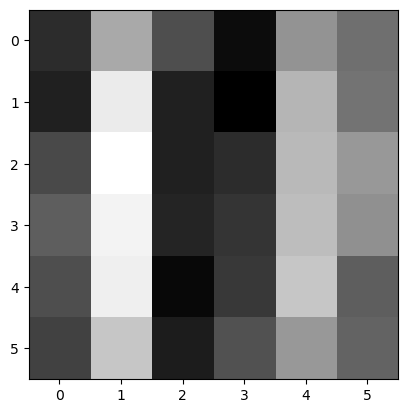

In [13]:
flt = np.array([[-1, 1, -1], [-1, 1, -1], [-1, 1, -1]])
flt_h, flt_w = flt.shape
flt = flt.reshape(-1)

img_h, img_w = images.shape
out_h = img_h - flt_h + 1
out_w = img_w - flt_w + 1

cols = im2col(images, flt_h, flt_w, out_h, out_w)

image_out = np.dot(flt, cols).reshape(out_h, out_w) # convolution
plt.imshow(image_out, cmap='gray')
plt.show()